# lab-handling-data-imbalance-classification

# TOC:
* [Get the HEALTHCARE4ALL data set](#first-bullet)
* [Get 20 features or so and the target (outcome)](#second-bullet)
* [Log Regression Classifier](#third-bullet)
* [Treat for Inbalance](fourth-bullet)
* [Random forest Classifier](#fifth-bullet)
* [Log Regression Classifier](#sixth-bullet)
* [Mailing Campaign Revenue analysis](#seventh-bullet)

In [128]:
# import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2
from sklearn.model_selection import cross_val_score


# Get the HEALTHCARE4ALL data set <a class="anchor" id="first-bullet"></a>


In [129]:
num = pd.read_csv('numerical.csv')
cat = pd.read_csv('categorical.csv')
targ = pd.read_csv('target.csv')

In [130]:
num

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [131]:
targ

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [132]:
all_data = pd.concat((num,targ),axis=1)
all_data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,...,12.0,10.0,4,7.741935,95515,0,4,39,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,...,25.0,25.0,18,15.666667,148535,0,2,1,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,...,16.0,5.0,12,7.481481,15078,1,4,60,0,0.0
3,0,70.000000,1,4,2,0,23,14,31,3,...,11.0,10.0,9,6.812500,172556,1,4,41,0,0.0
4,0,78.000000,3,2,60,1,28,9,53,26,...,15.0,15.0,14,6.864865,7112,1,2,26,0,0.0


In [133]:
# donations_data = all_data[all_data['TARGET_B']==1] #numerical data for the people that have donated 
# X = donations_data.drop(columns=['TARGET_D','TARGET_B'])
# y = donations_data['TARGET_B'] # beacuse we want to do a classification donor or not donor

In [134]:
X = all_data.drop('TARGET_B',axis = 1)
y = all_data['TARGET_B']

# Get 20 features or so and the target (outcome) <a class="anchor" id="second-bullet"></a>


In [135]:
#ørdinary Least Squares Regression model:
X_added_constant = sm.add_constant(X)
X_added_constant
#we add a constant column ( all 1s)

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,...,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_D
0,1.0,0,60.000000,5,9,0,0,39,34,18,...,5.0,12.0,10.0,4,7.741935,95515,0,4,39,0.0
1,1.0,1,46.000000,6,9,16,0,15,55,11,...,10.0,25.0,25.0,18,15.666667,148535,0,2,1,0.0
2,1.0,1,61.611649,3,1,2,0,20,29,33,...,2.0,16.0,5.0,12,7.481481,15078,1,4,60,0.0
3,1.0,0,70.000000,1,4,2,0,23,14,31,...,2.0,11.0,10.0,9,6.812500,172556,1,4,41,0.0
4,1.0,0,78.000000,3,2,60,1,28,9,53,...,3.0,15.0,15.0,14,6.864865,7112,1,2,26,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1.0,1,61.611649,5,9,0,14,36,47,11,...,25.0,25.0,25.0,9,25.000000,184568,0,1,12,0.0
95408,1.0,1,48.000000,7,9,1,0,31,43,19,...,20.0,20.0,20.0,9,20.000000,122706,1,1,2,0.0
95409,1.0,1,60.000000,5,9,0,0,18,46,20,...,3.0,10.0,10.0,3,8.285714,189641,1,3,34,0.0
95410,1.0,0,58.000000,7,9,0,0,28,35,20,...,5.0,21.0,18.0,4,12.146341,4693,1,4,11,18.0


In [136]:
model = sm.OLS(y,X_added_constant).fit() #fit the model 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TARGET_B   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     473.6
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:41:02   Log-Likelihood:                 54400.
No. Observations:               95412   AIC:                        -1.082e+05
Df Residuals:                   95095   BIC:                        -1.052e+05
Df Model:                         316                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.008      0.287      0.774      -0.013       0.017
TCODE       8.695e-07   4.66e-07      1.866      0.062   -4.39e-08    1.78e-06
AGE        -5.704e-05   3.37e-05     -1.694      0.090      -0.000    8.97e-06
INCOME         0.0007      0.000      2.345      0.019       0.000       0.001
WEALTH1       -0.0005      0.000     -2.213      0.027      -0.001   -5.37e-05
HIT         5.352e-06   5.02e-05      0.107      0.915    -9.3e-05       0.000
MALEMILI       0.0002      0.000      0.970      0.332      -0.000       0.000
MALEVET     2.992e-05    8.6e-05      0.348      0.728      -0.000       0.000
VIETVETS   -1.695e-05   5.66e-05     -0.300      0.764      -0.000    9.39e-05
WWIIVETS    5.503e-05   5.74e-05      0.960      0.337   -5.74e-05       0.000
LOCALGOV    5.721e-06      0.000      0.028      0.977      -0.000       0.000
STATEGOV    1.014e-05      0.000      0.058      0.954      -0.000       0.000
FEDGOV        -0.0002      0.000     -0.841      0.400      -0.001       0.000
WEALTH2        0.0005      0.000      2.342      0.019    7.79e-05       0.001
POP901     -7.197e-08   6.88e-07     -0.105      0.917   -1.42e-06    1.28e-06
POP902     -2.508e-06   2.51e-06     -1.000      0.317   -7.43e-06    2.41e-06
POP903      1.737e-06   1.34e-06      1.292      0.196   -8.97e-07    4.37e-06
POP90C1        0.0004      0.001      0.393      0.694      -0.002       0.002
POP90C2        0.0004      0.001      0.374      0.709      -0.002       0.002
POP90C3        0.0003      0.001      0.347      0.729      -0.002       0.002
POP90C4        0.0002      0.014      0.011      0.991      -0.028       0.028
POP90C5        0.0003      0.014      0.018      0.986      -0.028       0.028
ETH1          -0.0024      0.001     -3.054      0.002      -0.004      -0.001
ETH2           0.0005      0.001      0.532      0.595      -0.001       0.002
ETH3        5.988e-05      0.000      0.254      0.800      -0.000       0.001
ETH4          -0.0004      0.001     -0.827      0.408      -0.001       0.001
ETH5           0.0018      0.001      2.164      0.030       0.000       0.003
ETH6           0.0004      0.001      0.419      0.675      -0.001       0.002
ETH7           0.0003      0.001      0.529      0.597      -0.001       0.001
ETH8         7.58e-05      0.001      0.149      0.881      -0.001       0.001
ETH9           0.0004      0.001      0.802      0.423      -0.001       0.001
ETH10       5.167e-05      0.001      0.075      0.940      -0.001       0.001
ETH11          0.0002      0.001      0.362      0.717      -0.001       0.002
ETH12          0.0005      0.001      0.648      0.517      -0.001       0.002
ETH13         -0.0019      0.001     -2.295      0.022      -0.004      -0.000
ETH14         -0.0018      0.001     -1.997      0.046      -0.004   -3.36e-05
ET

In [137]:
kbest = SelectKBest(chi2, k=20).fit_transform(X, y)
selected = pd.DataFrame(kbest)

In [138]:
# To check the scores
model = SelectKBest(chi2, k=20).fit(X, y)
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = X.columns

df.sort_values(by = ['score'], ascending = False).head(40)

,score,Column
315,1.415081e+06,TARGET_D
311,5.277164e+05,CONTROLN
140,1.879840e+05,IC5
83,4.985561e+04,HV1
84,4.956107e+04,HV2
0,3.908707e+04,TCODE
133,2.689143e+04,MSA
13,1.716723e+04,POP901
137,2.921367e+03,IC2
14,2.811233e+03,POP902


In [139]:
X = X[['RFA_2F','CARDGIFT','HVP1','ETH2','RP1','NGIFTALL','HV1','ETHC5','CARDPROM','NUMPROM','RP3','CLUSTER2','INCOME','IC15','MSA','CONTROLN','HHAS4','HC6','POBC2','MHUC1']]

<AxesSubplot:>

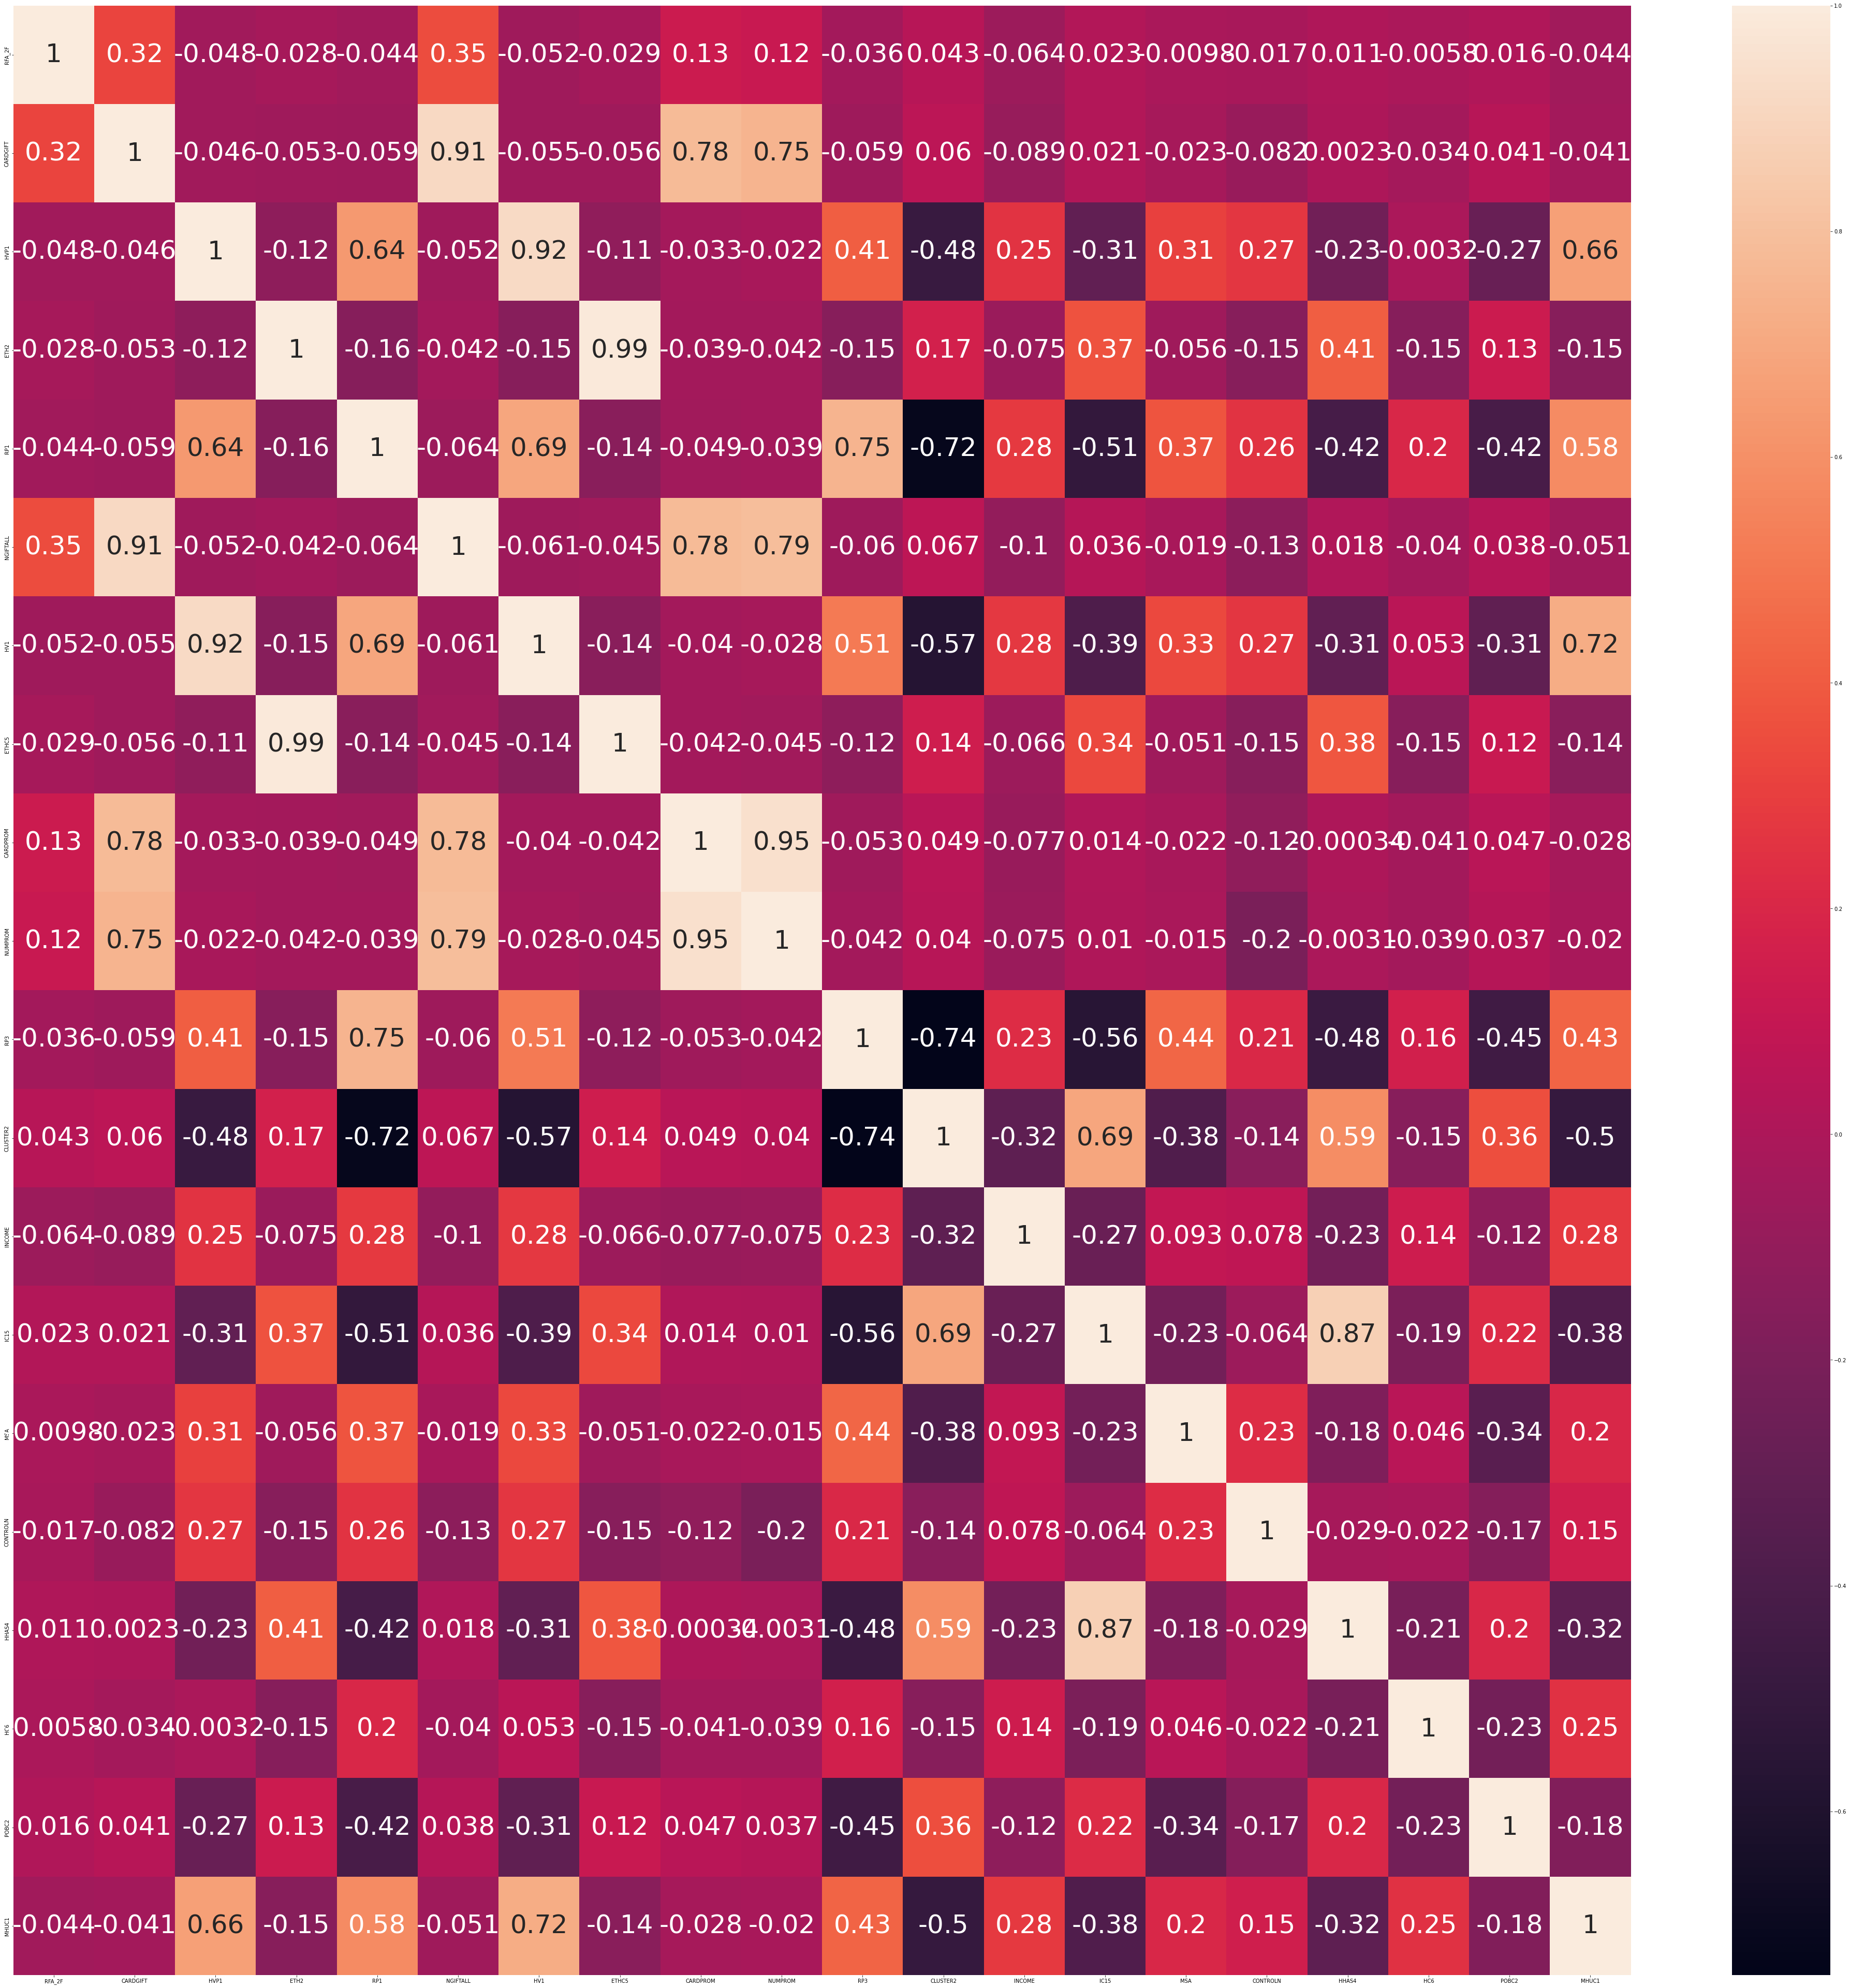

In [140]:
fig, ax = plt.subplots(figsize=(70, 70))
sns.heatmap(X.corr(),annot=True, annot_kws={'size': 50})

We drop NUMPROM as is correlated to CARDPROM (0.95 corr) and CARDPROM corr woth target is bigger 

In [141]:
#drop multicolinearity
X = X.drop(["NUMPROM"], axis = 1)

In [142]:
X.isna().sum()
#no Null values 

RFA_2F      0
CARDGIFT    0
HVP1        0
ETH2        0
RP1         0
NGIFTALL    0
HV1         0
ETHC5       0
CARDPROM    0
RP3         0
CLUSTER2    0
INCOME      0
IC15        0
MSA         0
CONTROLN    0
HHAS4       0
HC6         0
POBC2       0
MHUC1       0
dtype: int64

3.Build a DF with the 20 features and outcome 


In [143]:
X

,RFA_2F,CARDGIFT,HVP1,ETH2,RP1,NGIFTALL,HV1,ETHC5,CARDPROM,RP3,CLUSTER2,INCOME,IC15,MSA,CONTROLN,HHAS4,HC6,POBC2,MHUC1
0,4,14,2,1,2,31,479,0,27,17,39,5,4,0.0,95515,1,31,74,6
1,2,1,97,0,91,3,5468,0,12,91,1,6,2,4480.0,148535,3,97,39,20
2,4,14,0,2,0,27,497,1,26,9,60,3,20,0.0,15078,11,50,84,9
3,4,7,10,0,1,16,1000,0,27,17,41,1,35,9340.0,172556,20,39,67,16
4,2,8,0,98,25,37,576,58,43,74,26,3,21,5000.0,7112,14,6,65,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,0,2,10,69,1,988,6,6,92,12,5,9,380.0,184568,6,78,26,16
95408,1,0,18,3,16,1,1679,2,4,44,2,7,10,3360.0,122706,7,94,51,18
95409,3,4,0,14,3,7,376,7,14,78,34,5,26,4040.0,189641,26,0,82,5
95410,4,18,89,1,88,41,2421,0,36,90,11,7,4,8735.0,4693,3,17,50,12


In [144]:
y = all_data['TARGET_B']

In [145]:
y

0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    1
95411    0
Name: TARGET_B, Length: 95412, dtype: int64

# Log Regression Classifier <a class="anchor" id="third-bullet"></a>

In [146]:
# X Y split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(num, y, test_size=0.25)

In [147]:
# Train test split 
#normalize
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train)

num_train_minmax = transformer.transform(X_train)
num_test_minmax = transformer.transform(X_test)

In [148]:
#log reg model 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train,y_train)


/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [149]:
classifier.score(X_train, y_train)

0.9483922357774703

In [150]:
classifier.score(X_test, y_test)

0.9484760826730391

# Treat for Inbalance <a class="anchor" id="fouth-bullet"></a>

4.Treat for imbalance. Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.


In [151]:
targ.TARGET_B.value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [152]:
#there is an imbalance between people that donated and peole that didn't 

In [153]:
#we get the DF with the target (x-train and y-train)
data = pd.concat([num, targ.TARGET_B], axis=1)

In [154]:
#downsampling so we do not create artificial data 
from sklearn.utils import resample
#split (train) on 2 majority class 

category_0 = data[data['TARGET_B'] == 0]
category_1 = data[data['TARGET_B'] == 1]
print(len(category_0))
print(len(category_1))

#create a new DF category_0 by downsampling from 90569 to 4843
category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))
print(len(category_0_undersampled))

90569
4843
4843


In [155]:
print(category_0_undersampled.shape)
print(category_1.shape)
# the sampkes are balanced now 

(4843, 316)
(4843, 316)


In [156]:
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)

5.Apply classification (Log Regression and Decisssion Tree Regresion)


In [157]:
# NEW X Y split 
X = data_downsampled.drop(["TARGET_B"], axis=1)
y = data_downsampled["TARGET_B"]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

num_train_minmax = transformer.transform(X_train)
num_test_minmax = transformer.transform(X_test)

classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train,y_train)

print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.545704845814978
0.5396366639141206


/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [159]:
#Undersampling does not give better results 

In [160]:
#Oversampling :
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

print(category_0.shape)
print(category_1_oversampled.shape)



(90569, 316)
(90569, 316)


In [161]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [162]:
data_upsampled['TARGET_B'].value_counts()

0    90569
1    90569
Name: TARGET_B, dtype: int64

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

num_train_minmax = transformer.transform(X_train)
num_test_minmax = transformer.transform(X_test)

classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train,y_train)

print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.5512114537444934
0.5359207266721717


/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


6.Compare results 

None of the down or up sample gets better results.

# Random forest Classifier  <a class="anchor" id="fifth-bullet"></a>

In [164]:
data_upsampled 

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B
0,0,60.000000,5,9,0,0,39,34,18,10,...,5.0,12.0,10.0,4,7.741935,95515,0,4,39,0
1,1,46.000000,6,9,16,0,15,55,11,6,...,10.0,25.0,25.0,18,15.666667,148535,0,2,1,0
2,1,61.611649,3,1,2,0,20,29,33,6,...,2.0,16.0,5.0,12,7.481481,15078,1,4,60,0
3,0,70.000000,1,4,2,0,23,14,31,3,...,2.0,11.0,10.0,9,6.812500,172556,1,4,41,0
4,0,78.000000,3,2,60,1,28,9,53,26,...,3.0,15.0,15.0,14,6.864865,7112,1,2,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92085,0,86.000000,1,3,8,0,33,13,66,6,...,2.0,9.0,4.0,4,3.956522,37221,0,3,29,1
10529,0,46.000000,5,9,0,1,41,29,34,3,...,3.0,31.0,28.0,2,17.888889,97774,0,4,53,1
22948,1,52.000000,2,1,17,0,21,57,17,0,...,3.0,6.0,6.0,1,5.500000,60526,1,4,50,1
3482,0,76.000000,2,2,1,0,26,31,43,12,...,5.0,20.0,20.0,13,12.400000,43013,1,1,57,1


In [165]:
X = data_upsampled.drop(["TARGET_B"], axis=1)
y = data_upsampled["TARGET_B"]

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train_minmax = transformer.transform(X_train)
X_test_minmax = transformer.transform(X_test)
len(X_train_minmax)

135853

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,           # depth of the tree (max number of questions) 
                             min_samples_split=20,  # amount of samples still considered at everyb question 
                             min_samples_leaf =20,  # utimate answer based on at least this many rows 
                             max_samples=0.8,       # fraction of X-train to use in each tree 
                             random_state = 42)

clf.fit(X_train_minmax, y_train)
print(clf.score(X_train_minmax, y_train))
print(clf.score(X_test_minmax , y_test))

y_pred = clf.predict(X_test_minmax)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6163794689848586
0.6141106326598211


0    22643
1    22642
Name: TARGET_B, dtype: int64

array([[13728,  8915],
       [ 8560, 14082]])

# Random forest Regressor  <a class="anchor" id="sixth-bullet"></a>

In [168]:
data_imbalanced_2 = pd.concat([num, targ.TARGET_D,targ.TARGET_B],axis=1)
data_imbalanced_2

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_D,TARGET_B
0,0,60.000000,5,9,0,0,39,34,18,10,...,12.0,10.0,4,7.741935,95515,0,4,39,0.0,0
1,1,46.000000,6,9,16,0,15,55,11,6,...,25.0,25.0,18,15.666667,148535,0,2,1,0.0,0
2,1,61.611649,3,1,2,0,20,29,33,6,...,16.0,5.0,12,7.481481,15078,1,4,60,0.0,0
3,0,70.000000,1,4,2,0,23,14,31,3,...,11.0,10.0,9,6.812500,172556,1,4,41,0.0,0
4,0,78.000000,3,2,60,1,28,9,53,26,...,15.0,15.0,14,6.864865,7112,1,2,26,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,25.0,25.0,9,25.000000,184568,0,1,12,0.0,0
95408,1,48.000000,7,9,1,0,31,43,19,4,...,20.0,20.0,9,20.000000,122706,1,1,2,0.0,0
95409,1,60.000000,5,9,0,0,18,46,20,7,...,10.0,10.0,3,8.285714,189641,1,3,34,0.0,0
95410,0,58.000000,7,9,0,0,28,35,20,9,...,21.0,18.0,4,12.146341,4693,1,4,11,18.0,1


In [169]:
donations = data_imbalanced_2[data_imbalanced_2['TARGET_B']==1] #numerical data for the people that have donated 
X = data_imbalanced_2.drop(columns=['TARGET_B','TARGET_D'])
y = data_imbalanced_2['TARGET_D'] # beacuse we want to do a classification donor or not donor

In [170]:
def forest_2(df):
    
    ####
    # x - y - split
    #####
    features = df.drop(['TARGET_D'],axis=1)
    target = df['TARGET_D']
    
    ####
    # train - test - split
    #####
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)
    
    ####
    # scaling Xtrain in scaler
    #####
    transformer = MinMaxScaler().fit(X_train)
    num_train_minmax = transformer.transform(X_train)
    num_test_minmax = transformer.transform(X_test)
    
    #####
    # fitting train set in model
    ######
    classifier = RandomForestRegressor(max_depth=5, # max number of questions
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8) # fraction of original dataset
                             
    classifier.fit(X_train, y_train)
    
    ####
    # metrics
    #####
    score_1 = classifier.score(X_train, y_train)
    score_2 = classifier.score(X_test, y_test)
    
    ####
    # predictions
    ####
    pred = classifier.predict(X_test)
    
    return print('train',score_1,'\n''test',score_2,'\n''\n',
                 'predicted donation', np.mean(pred))

In [171]:
forest_2(donations)

train 0.5420732101710961 
test 0.5400677118291946 

 predicted donation 15.38955051984092


# Mailing Campaign Revenue analysis   <a class="anchor" id="seventh-bullet"></a>



 NOW WE CAN CALCULATE THE REVENUE THAT WE WILL GET WITH THE MAILING CAMPAIGN

In [172]:
mailing_cost = 0.68
all_pop = len(targ)
only_donors = len(donations)
av_donation_donors = 15.628022799265295

If we send mailing campaign to evryone:

In [173]:
revenue_all = (only_donors * av_donation_donors) - (all_pop * mailing_cost)
revenue_all

10806.354416841816

If we send mailing campaign to just donors:

In [174]:
revenue_don = (only_donors * av_donation_donors) - (only_donors * mailing_cost)
revenue_don

72393.27441684181

We can conclude that our model (which is not very good) points that it's more profitable to send mailing onlky ti donors 




In [175]:
!git add .

In [178]:
!git commit -m'finished'

On branch master
Your branch is ahead of 'origin/master' by 3 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../.DS_Store

no changes added to commit (use "git add" and/or "git commit -a")


In [179]:
!git push

To https://github.com/chrislacarte/lab-handling-data-imbalance-classification
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs to 'https://github.com/chrislacarte/lab-handling-data-imbalance-classification'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
